# 数据无量纲处理-归一化

- 数据归一化

- x=max,则最大结果为1；
- x=min，则最小结果为0；
- 这样保证了所有数据都在0-1范围

$$x^* = \frac{x - min(x)}{max(x)-min(x)}$$

In [29]:
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
data

[[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

In [30]:
import numpy as np
X = np.array([[-1, 2], [-0.5, 6], [0, 10], [1, 18]])
X

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

In [31]:
X.min(axis=0)

array([-1.,  2.])

In [32]:
X.max()
# 无参数，则默认为所有数据最大值

18.0

In [33]:
X.max(axis=0)
# 每一行的最大值

array([ 1., 18.])

In [34]:
X.max(axis=1)
# 每一列的最大值

array([ 2.,  6., 10., 18.])

In [35]:
# 归一化
# 归一化normalize; normalization
X = np.array([[-1, 2], [-0.5, 6], [0, 10], [1, 18]])
# axis=0 行      axis=1 列
X_nor = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_nor

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [36]:
# 逆转归一化
X_returned = X_nor * (X.max(axis=0) - X.min(axis=0)) + X.min(axis=0)
X_returned

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

In [37]:
import pandas as pd
x = pd.DataFrame(data)
x

,0,1
0,-1.0,2
1,-0.5,6
2,0.0,10
3,1.0,18


# 使用pandas来实现归一化

In [38]:
# 归一化
x_nor = (x - x.min()) / (x.max() - x.min())
x_nor

,0,1
0,0.00,0.00
1,0.25,0.25
2,0.50,0.50
3,1.00,1.00


In [39]:
# 逆转归一化
x_returned = x_nor * (x.max() - x.min()) + x.min()
x_returned

,0,1
0,-1.0,2.0
1,-0.5,6.0
2,0.0,10.0
3,1.0,18.0


# sklearn preprocessing.MinMaxScaler 实现归一化

- 缩放到一个指定的最大和最小值(通常是1-0，可超过这个区间范围)之间,这可以通过preprocessing.MinMaxScaler类实现


- MinMaxScaler 移动数据，使所有特征都刚好位于 0 和 1 之间

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

X = np.array([[ 1., -1.,  2.],
               [ 2.,  0.,  0.],
               [ 0.,  1., -1.]])

scaler=MinMaxScaler()
X_train_minmax=scaler.fit_transform(X)
print(X_train_minmax)

[[0.5        0.         1.        ]
 [1.         0.5        0.33333333]
 [0.         1.         0.        ]]


In [42]:
from sklearn.preprocessing import StandardScaler
import numpy as np

X = np.array([[ 1., -1.,  2.],
               [ 2.,  0.,  0.],
               [ 0.,  1., -1.]])

scaler=StandardScaler()
scaler.fit(X)
print(scaler.mean_)
print(scaler.var_)
print(scaler.transform(X))

[1.         0.         0.33333333]
[0.66666667 0.66666667 1.55555556]
[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]


In [43]:
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

In [44]:
# scaler缩放器；缩放控制器
# 实现归一化
scaler = MinMaxScaler()              
#实例化
scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [45]:
scaler = scaler.fit(data)    
# fit合适；拟合
scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [173]:
scaler?

In [46]:
scaler.feature_range 

(0, 1)

In [47]:
result = scaler.transform(data)      
# 通过接口导出结果 transform转换；转化；转变，变革
result

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [48]:
# inverse反面；相反的事物
# 将归一化后的结果逆转
scaler.inverse_transform(result)     

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

In [49]:
scaler.data_min_

array([-1.,  2.])

In [50]:
scaler.data_max_

array([ 1., 18.])

In [51]:
scaler.data_range_
# range范围；值域；全距
# 初始化的scaler对象缩放器的范围 最小值2 最大值18

array([ 2., 16.])

In [52]:
# 使用MinMaxScaler的参数feature_range实现将数据归一化到[0,1]以外的范围中
# feature range 特征范围
scaler = MinMaxScaler(feature_range=[5,10])    
# 初始化，特征范围在5-10区间内
result = scaler.fit_transform(data)            
# fit_transform一步导出结果
result

array([[ 5.  ,  5.  ],
       [ 6.25,  6.25],
       [ 7.5 ,  7.5 ],
       [10.  , 10.  ]])

# partial_fit 100GB数据切割训练做预处理

- 当X中的特征数量非常多的时候，fit会报错并表示，数据量太大计算不了
- 此时使用partial_fit作为训练接口    
- scaler = scaler.partial_fit(data)
- partial_fit这个方法的一般用在如果训练集数据量非常大，一次不能全部载入内存的时候
- 这时我们可以把训练集分成若干等分，重复调用partial_fit来一步步的学习训练集
- partial 偏袒的；局部的；不公平的
- 使用该方法时，最好每次数据块都足够大，推荐每次填满整个内存
- 通过连续调用partial_fit方法，成百上千GB的数据集就可以被切成一块一块地来进行训练
- partial_fit(X,y,classes=None,sample_weight=None)

In [53]:
partial_data = scaler.partial_fit(data)
partial_data

MinMaxScaler(copy=True, feature_range=[5, 10])

In [54]:
partial_data.feature_range 

[5, 10]

# 数据标准化-数据归一化区别


- 每个值减去均值后除以标准差，让每个值都变小；
- 原先的分布是否符合正太分布，标准化后也是否符合正太分布；
- 标准化只是将数据比例缩小；
- 做了位置和大小转变


- 大样本大数定理下，是否大量数据符合正太分布？
- =>也是不符合，原有样本不会因为标准化导致正太


- 每次样本取出均值Xi，取多次数据，X1X2X3...Xn
- 这些Xn的变量的平均数为： ∑(X1+X2+Xn)/n=X拔
- 平均值的分布是大数定理，跟标准化无关


- 归一化，x-min/max-min，区间一定在0-1之间；
- 标准化，x-μ/δ，区间不一定在0-1，会超过，仍然是正无穷和负无穷之间


- 归一化对异常值处理会出现异常情况，导致数据极端小
- 标准化会减少这种异常情况使得数据分布更泛
- 标准化比归一化更好


# 标准化公式计算


- StandardScaler 确保每个特征的平均值为 0、方差为 1，使所有特征都位于同一量级。


$$x^* = \frac{x-μ}\sigma$$ 

In [55]:
from sklearn.preprocessing import StandardScaler
import numpy as np

X = np.array([[ 1., -1.,  2.],
               [ 2.,  0.,  0.],
               [ 0.,  1., -1.]])

scaler=StandardScaler()
scaler.fit(X)
print(scaler.mean_)
print(scaler.var_)
print(scaler.transform(X))

[1.         0.         0.33333333]
[0.66666667 0.66666667 1.55555556]
[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]


In [56]:
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
data

[[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
# fit，本质是生成均值和方差

StandardScaler(copy=True, with_mean=True, with_std=True)

In [209]:
scaler?

In [58]:
scaler.mean_
# The mean value for each feature in the training set.
# 训练集中每个特征的平均值
# 每列的均值

array([-0.125,  9.   ])

In [59]:
scaler.var_
# 二维数据每列的方差

array([ 0.546875, 35.      ])

In [60]:
x_std = scaler.transform(data)    
# 对数据仅转换处理，使得转换为标准化数据
x_std

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

In [61]:
scaler2 = scaler.fit_transform(data)
scaler2
# fit_transform =  fit  + transform

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

In [63]:
scaler.mean_
# 均值

array([-0.125,  9.   ])

In [68]:
scaler.var_
# 方差

array([ 0.546875, 35.      ])

In [69]:
scaler.inverse_transform(x_std)   
# 使用inverse_transform逆转标准化

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

# 数据标准化不会改变数据分布


In [70]:
from sklearn.preprocessing import StandardScaler  
# 导入标准化包
from sklearn.preprocessing import MinMaxScaler
# 导入归一化包

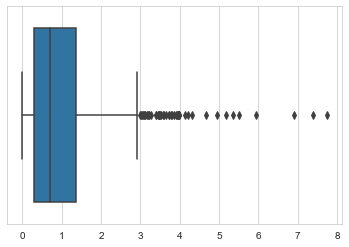

In [72]:
import matplotlib.pyplot as plt   
import seaborn as sns
sns.set_style("whitegrid")
# 导入可视化包
# exponential指数的；由指数表示的；越来越快的
ex = np.random.exponential(size=1000)
# 指数公式 y=e x次方 长尾分布
sns.boxplot(ex)
plt.show()

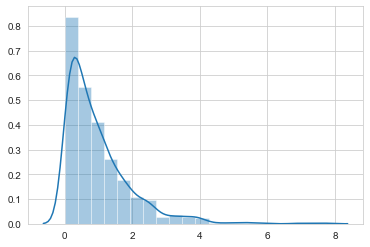

In [73]:
import seaborn as sns
sns.distplot(ex,bins=20)
# 分布图 distributed分布式；分散式；分布式的
# 设置了20个矩形条

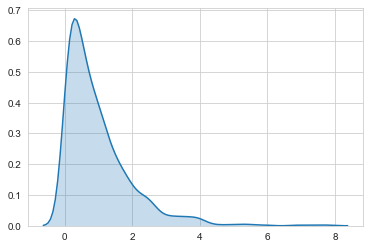

In [74]:
sns.kdeplot(ex,shade=True)
# shade控制阴影

In [75]:
ex.shape
# 1列1000行数据，代入算法API内需转成二维维度
# reshape(-1,1)可将一维转成二维

(1000,)

In [76]:
type(MinMaxScaler(ex))

sklearn.preprocessing.data.MinMaxScaler

In [78]:
# ex.reshape(-1,1)
# array([[5.96881808e-01],[6.21533398e-01],[3.89783557e-01],

In [79]:
type(ex.reshape(-1,1))

numpy.ndarray

In [80]:
ex.reshape(-1,1).shape

(1000, 1)

In [81]:
MinMaxScaler(ex)
# 对数据集进行归一化处理

MinMaxScaler(copy=True,
             feature_range=array([6.55887162e-01, 8.78661855e-01, 6.89684011e-01, 7.38990517e-01,
       6.68582392e-02, 5.03404978e-01, 9.72054034e-01, 3.79350538e-01,
       1.35410698e+00, 1.20892030e+00, 6.01581719e-01, 3.83603714e-01,
       1.44245214e+00, 4.16373402e-01, 1.01228469e+00, 1.51103336e-02,
       1.05974315e+00, 1.51797035e+00, 6.66790919e-02, 4.19445795e-01,
       3.0019...
       4.34595964e-01, 9.65982228e-01, 5.94581771e-01, 8.74265367e-01,
       1.24603752e+00, 5.11988702e-02, 5.32461166e-01, 5.08069505e-01,
       1.18429069e+00, 4.42324064e-01, 1.43093792e+00, 6.22143184e-01,
       2.32098948e+00, 1.58132208e+00, 3.39394118e+00, 6.74501981e-01,
       1.36798263e+00, 1.98694249e+00, 3.38635972e-01, 2.47140092e-01,
       5.82892378e-01, 1.89872344e+00, 8.64809794e-02, 1.87665594e+00]))

In [82]:
ext = ex.reshape(-1,1)
mmsext = MinMaxScaler(ext)
# mmsext
# MinMaxScaler(copy=True,feature_range=array([[6.86503501e-01],[4.68746145e-01],[3.31356471e-01],

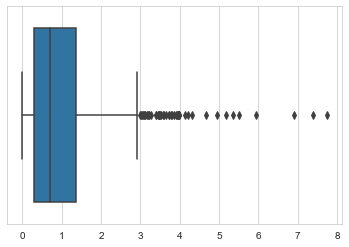

In [83]:
# feature_range=array,可通过二维数组形式绘图
sns.boxplot(mmsext.feature_range)

(array([538., 261., 110.,  48.,  24.,  10.,   4.,   2.,   1.,   2.]),
 array([7.18574369e-04, 7.74797369e-01, 1.54887616e+00, 2.32295496e+00,
        3.09703375e+00, 3.87111255e+00, 4.64519134e+00, 5.41927013e+00,
        6.19334893e+00, 6.96742772e+00, 7.74150652e+00]),
 <a list of 10 Patch objects>)

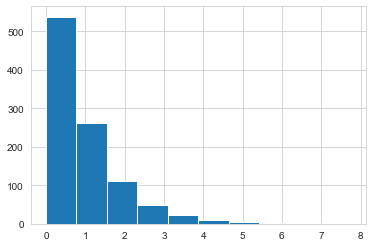

In [84]:
plt.hist(mmsext.feature_range)

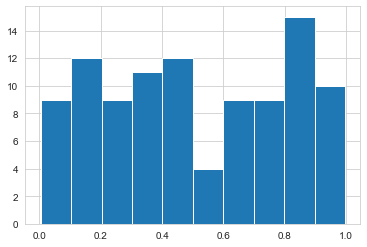

In [85]:
a = np.random.rand(100)           
# 生成100个随机数
a = a.reshape(-1,1)               
# sklearn只允许输入至少二维数组，所以需要对数据进行格式转换  
a = np.sort(a)                          
# 对数据进行排序
plt.hist(a);                      
# 绘制直方图

In [86]:
a = np.random.rand(10)
a = np.sort(a)
a

array([0.11400897, 0.15375719, 0.43376345, 0.47801202, 0.53206419,
       0.62913152, 0.72758992, 0.81932254, 0.82305561, 0.91343048])

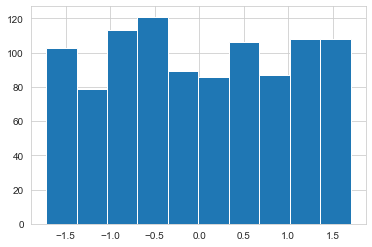

In [87]:
# 对数据进行标准化处理
# Standard规格；标准型；标准房
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()   
# 随机1000个数，随机后进行sort排序，排序后生成二维数组
# 对二维数组进行缩放器处理，标准化处理，(x-μ)/δ
b = scaler.fit_transform(np.sort(np.random.rand(1000)).reshape(-1,1))                       
plt.hist(b);                        

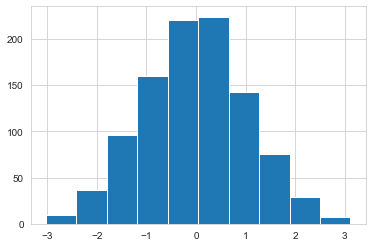

In [88]:
#标准正态分布的直方图
# numpy.random.randn(dx)是从标准正态分布中返回一个或多个样本值
# numpy.random.rand(d0, d1, …, dn)的随机样本位于[0, 1)之间
c = np.random.randn(1000)
# c.sort()
c = np.sort(c)
plt.hist(c);

# 正则化


- Normalizer 它对每个数据点进行缩放，使得特征向量的欧式长度等于 1 

In [89]:
from sklearn.preprocessing import Normalizer
import numpy as np

X = np.array([[ 1., -1.,  2.],
               [ 2.,  0.,  0.],
               [ 0.,  1., -1.]])

scaler=Normalizer(norm='l2')
X=scaler.fit_transform(X)
print(X)

[[ 0.40824829 -0.40824829  0.81649658]
 [ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]]


# 缺失值处理-SimpleImputer

- SimpleImputer?这个类是专⻔⽤来填补缺失值的

- strategy : string, optional (default="mean") 
- 策略：字符串，可选（默认值=“平均值”） 

- The imputation strategy. 
- 归因策略

- If "mean", then replace missing values using the mean along each column. Can only be used with numeric data. 
- 如果为“均值”，则使用均值和 每列。 只能与数字数据一起使用。 

- If "median", then replace missing values using the median along each column. Can only be used with numeric data. 
- 如果为“中位数”，则使用中位数和 每列。 只能与数字数据一起使用。 

- If "most_frequent", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. 
- 如果为“ most_frequent”，则使用最频繁的位置替换丢失的内容 每列的值。 可以与字符串或数字数据一起使用。

- If "constant", then replace missing values with fill_value. Can be used with strings or numeric data.
- 如果为“常数”，则将缺失的值替换为fill_value。 可 与字符串或数字数据一起使用。

In [92]:
import pandas as pd
road = r"D:\Media\Study\classroom\机器学习3-0224-\20200225-数据预处理及特征工程\Narrativedata.csv"
data = pd.read_csv(road)
data.head()
# Embarked上船；从事；装货；装(货)
# Survived幸存；存活；生存
# ：Embarked指乘客登船港⼝，S是英国的Southampton，C是法国的Cherbourg，Q是爱尔兰的Queens town）

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
Age         714 non-null float64
Sex         891 non-null object
Embarked    889 non-null object
Survived    891 non-null object
dtypes: float64(1), object(3)
memory usage: 28.0+ KB


In [96]:
# 查看缺失值
# 布尔类型数据进行ture和false，对null空值进行求和，得到为空值的结果个数
data.isnull().sum()

Age         177
Sex           0
Embarked      2
Survived      0
dtype: int64

In [97]:
# 缺失值比例 mean平均值；中庸；平均数；中间
data.isnull().mean()

Age         0.198653
Sex         0.000000
Embarked    0.002245
Survived    0.000000
dtype: float64

In [99]:
# 填补年龄
Age = data.loc[:,"Age"].values.reshape(-1,1)   
# loc 行，列，查找所有的行，age这列字段，的values值，进行二维数组转变
# sklearn当中特征矩阵必须是二维
Age[:10]

array([[22.],
       [38.],
       [26.],
       [35.],
       [35.],
       [nan],
       [54.],
       [ 2.],
       [27.],
       [14.]])

In [100]:
from sklearn.impute import SimpleImputer
# SimpleImputer 这个类是专⻔⽤来填补缺失值的
# impute把…归咎于；把…归因于；把…转嫁于
# Imputer 估算
imp_mean = SimpleImputer()                              

# 实例化，默认均值填补
# 我们填补缺失值的策略，默认均值。
# 输⼊“mean”使⽤均值填补（仅对数值型特征可⽤）
# 输⼊“median"⽤中值填补（仅对数值型特征可⽤）
# 输⼊"most_frequent”⽤众数填补（对数值型和字符型特征都可⽤）
# 输⼊“constant"表示请参考参数“fill_value"中的值（对数值型和字符型特征都可⽤）
# strategy 策略模式；谋略；计谋
imp_median = SimpleImputer(strategy="median")           

#实例化，用中位数填补
imp_0 = SimpleImputer(strategy="constant",fill_value=0) 
# 实例化，用0填补
# constant经常的；恒定的；永恒的常数；常量

# fit_transform一步完成调取结果
# mean均值填充
imp_mean = imp_mean.fit_transform(Age)
# median中位数填充
imp_median = imp_median.fit_transform(Age)
# 常数0填充
imp_0 = imp_0.fit_transform(Age)

# fit 适配 transform 转变
# fit_transform 适配且转变

print(imp_mean[:10].T)
print(imp_median[:10].T)
print(imp_0[:10].T)

[[22.         38.         26.         35.         35.         29.69911765
  54.          2.         27.         14.        ]]
[[22. 38. 26. 35. 35. 28. 54.  2. 27. 14.]]
[[22. 38. 26. 35. 35.  0. 54.  2. 27. 14.]]


In [101]:
# 使用中位数填补Age,填充后没有空值在age字段值内
data.loc[:,"Age"] = imp_median
data.Age.isnull().sum()

0

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
Age         891 non-null float64
Sex         891 non-null object
Embarked    889 non-null object
Survived    891 non-null object
dtypes: float64(1), object(3)
memory usage: 28.0+ KB


In [103]:
# 使用众数填补Embarked
# 分类变量，用众数进行填充
# Embarked上船；从事；装货；装(货)
# frequent频繁的；经常发生的 众数
Embarked = data.loc[:,"Embarked"].values.reshape(-1,1)
imp_mode = SimpleImputer(strategy = "most_frequent")
data.loc[:,"Embarked"] = imp_mode.fit_transform(Embarked)

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
Age         891 non-null float64
Sex         891 non-null object
Embarked    891 non-null object
Survived    891 non-null object
dtypes: float64(1), object(3)
memory usage: 28.0+ KB


# 使用numpy和pandas填补缺失值

In [106]:
import pandas as pd
data = pd.read_csv(road) 
data.head()

#查看缺失值
data.isnull().sum() 

#用中位数填补Age的缺失值
data.loc[:,"Age"] = data.loc[:,"Age"].fillna(data.loc[:,"Age"].median())

#由于Embarked的缺失值较少，可以直接删除
data.dropna(axis=0,inplace=True)
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No
